In [ ]:
#example geometric phase analysis - see 
# M. Hÿtch, E. Snoeck, R. Kilaas, Quantitative measurement of displacement and strain fields from HREM micrographs, Ultramicroscopy 74 (1998) 131–146
# J. L. Rouvière, E. Sarigiannidou, Theoretical discussions on the geometrical phase analysis, Ultramicroscopy 106 (2005) 1–17.
# GPA python package by Eric Prestat can be found here:
# https://github.com/ericpre/gpa
# to install locally on the jupyterhub home screen select:
# new -> terminal 
# then run the command:
# pip install git+https://github.com/ericpre/gpa --user

In [137]:
%matplotlib notebook
import gpa
import numpy as np
import glob
import math
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


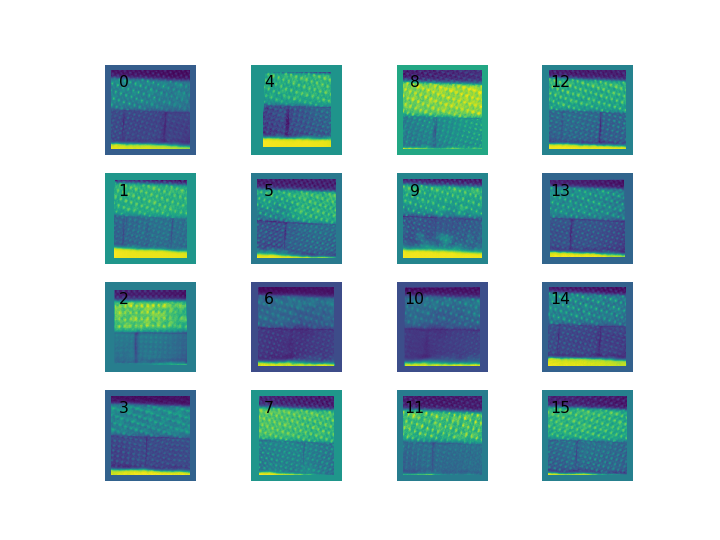

0 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_07.hspy
1 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_15.hspy
2 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_05.hspy
3 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_04.hspy
4 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_13.hspy
5 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_10.hspy
6 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_02.hspy
7 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_12.hspy
8 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_14.hspy
9 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_11.hspy
10 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_01.hspy
11 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_03.hspy
12 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90 BF_16.hspy
13 /dls/e02/data/2021/mg27180-7/processing/raw/A133/RotSTEM90

In [146]:
#display all files in path

#search path for data (here will search for *.hspy  but can use any other supported format (e.g *.dm3))

path = '/dls/e02/data/2021/mg27180-7/processing/raw/A133/*.hspy'

all_files = glob.glob(path)

i = 0 
j = 0
k = 0
rows = int(np.sqrt(len(all_files)))
cols = math.ceil(len(all_files) / rows)
fig, axs = plt.subplots(rows, cols)
for filename in all_files:
    print(i, filename)
    s = gpa.tools.hs.load(filename)
    axs[j,k].imshow(s.data)
    axs[j,k].axis('off')
    plt.text(0.2, 0.8,i,
     horizontalalignment='center',
     verticalalignment='center',
     transform = axs[j,k].transAxes)
    j +=1
    i +=1
    if j == rows:
        j = 0
        k +=1

<IPython.core.display.Javascript object>


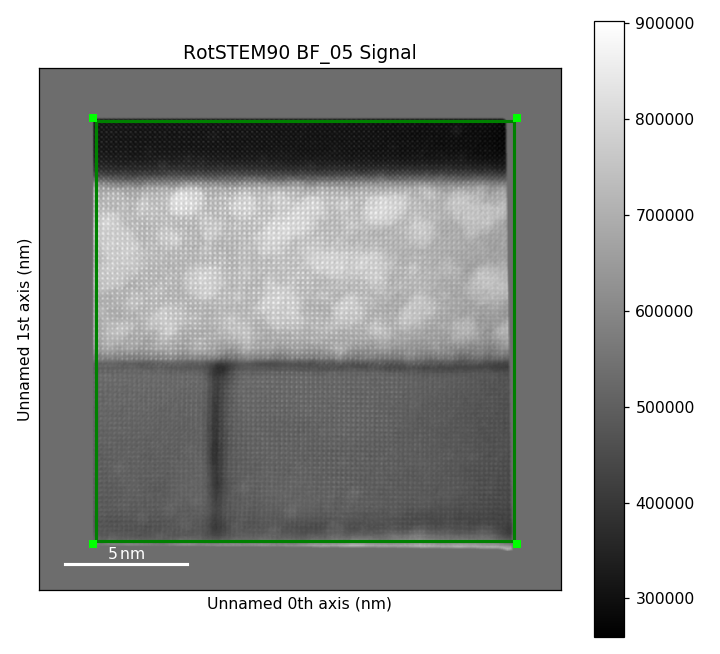

In [216]:
#select the number of the file to load from above and select the region of interest for GPA anaylsis
load_number = 2
load_file =all_files[load_number]

s = gpa.tools.hs.load(load_file)
s.set_signal_type('atomic_resolution')

#if necessary set the scale of the image 

s.axes_manager[0].scale = 0.0185941
s.axes_manager[0].units = 'nm' 
s.axes_manager[1].scale = 0.0185941
s.axes_manager[1].units = 'nm' 


s.plot()
rec_roi = gpa.tools.hs.roi.RectangularROI(left=3.84898, top=3.55147, right=38.6014, bottom=35.7936)
s_crop = rec_roi.interactive(s)

<IPython.core.display.Javascript object>


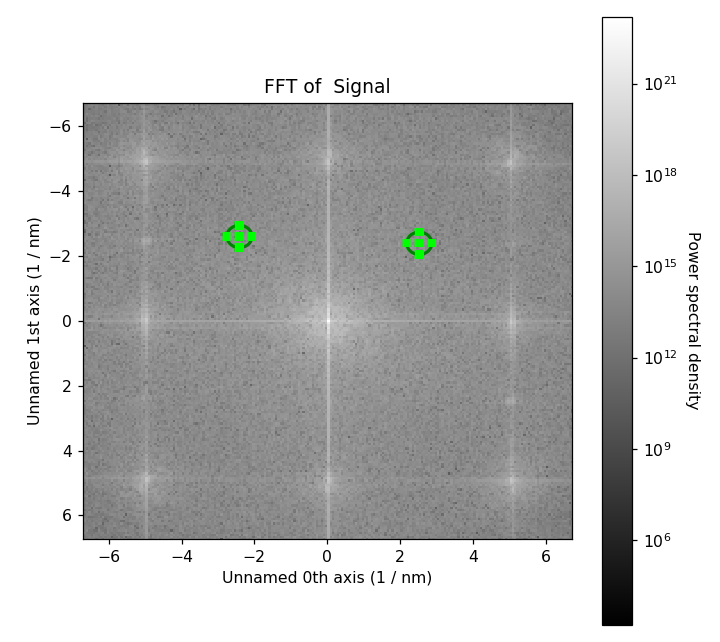

In [215]:
# choose the reflections for GPA analysis
# careful with choice of reflections when sublattices are present - see https://arxiv.org/pdf/1504.06089.pdf
gpa_tool = s_crop.create_gpa_tool()
gpa_tool.set_fft()
# Add ROIs for the two g_vectors
g_rois = [[-2.38, -2.6, 1.5], [2.55, -2.4, 1.5]]
gpa_tool.add_rois(g_rois)
gpa_tool.spatial_resolution = 0.28 * 5
# and plot
gpa_tool.plot_power_spectrum()

<IPython.core.display.Javascript object>


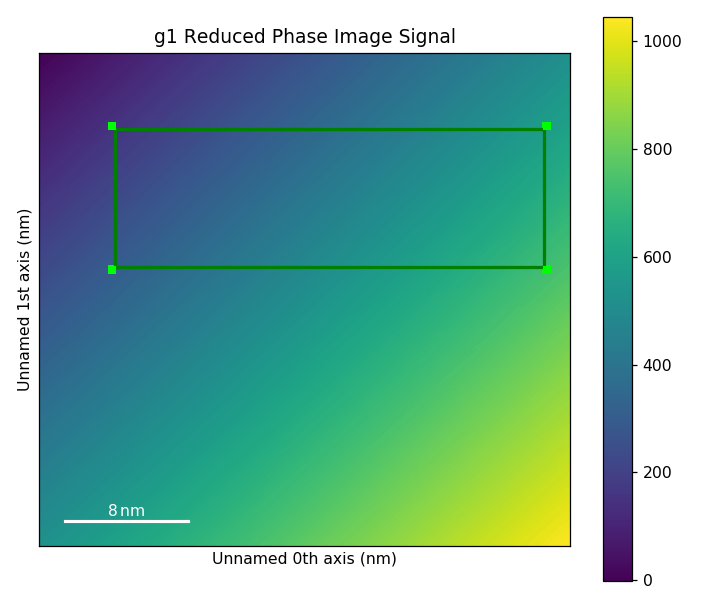

<IPython.core.display.Javascript object>


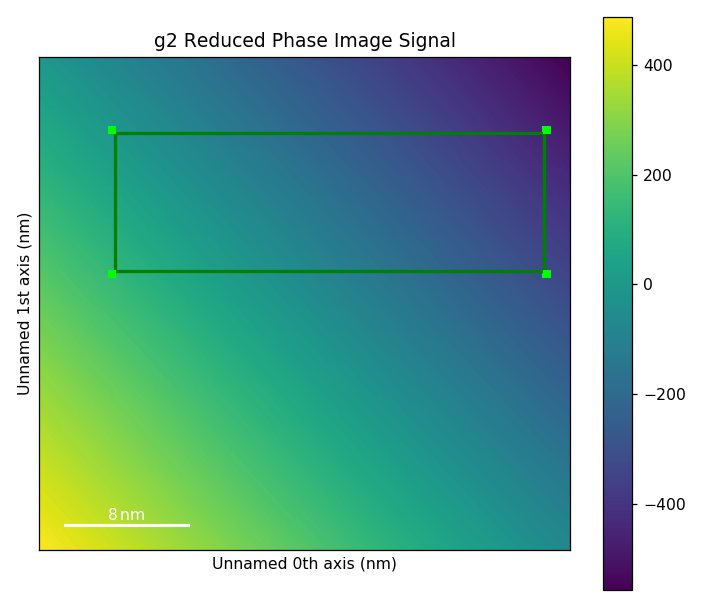

In [207]:
#calculate and plot phase
gpa_tool.calculate_phase()
gpa_tool.plot_phase()

In [209]:
# Add refinement ROI and refine phase
refinement_roi = [5, 5,33,14]
gpa_tool.set_refinement_roi(refinement_roi)


In [210]:
#refine phase
gpa_tool.refine_phase()

<IPython.core.display.Javascript object>


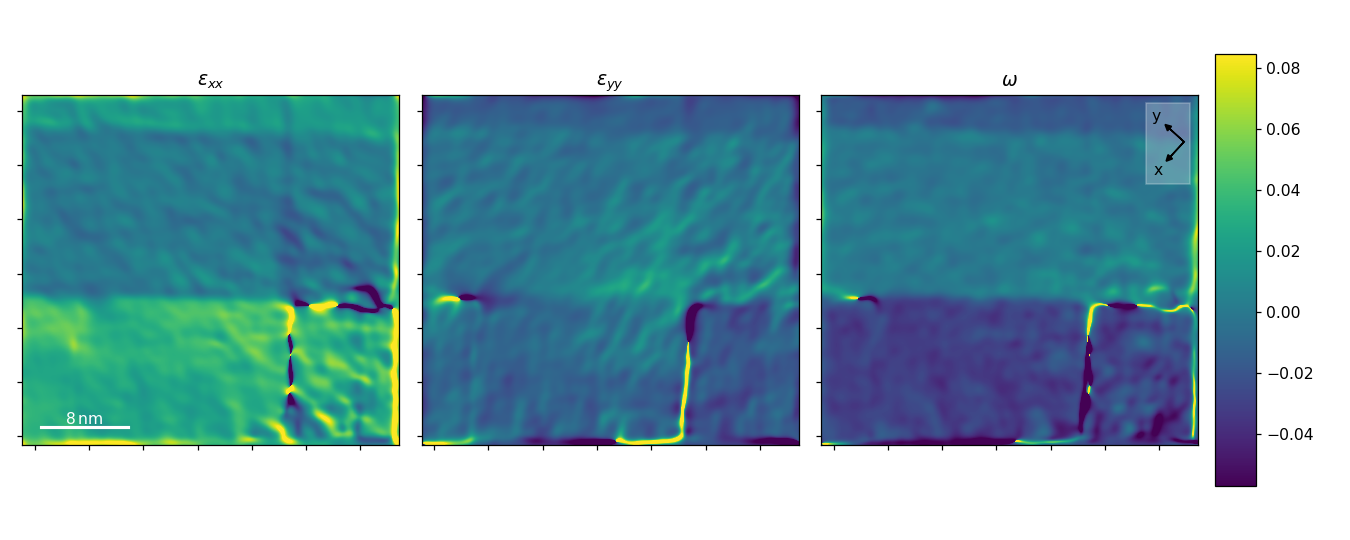

In [211]:
#calculate strain 
save_file = load_file[:-5] + '_strain.png'
gpa_tool.calculate_strain()
gpa_tool.plot_strain(threshold = 1)#, save_figure  = True, filename = save_file)

<IPython.core.display.Javascript object>


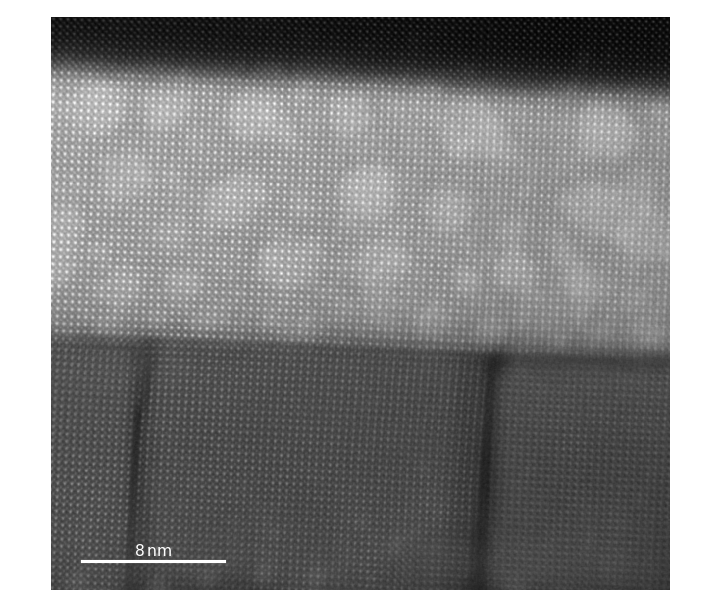

<IPython.core.display.Javascript object>


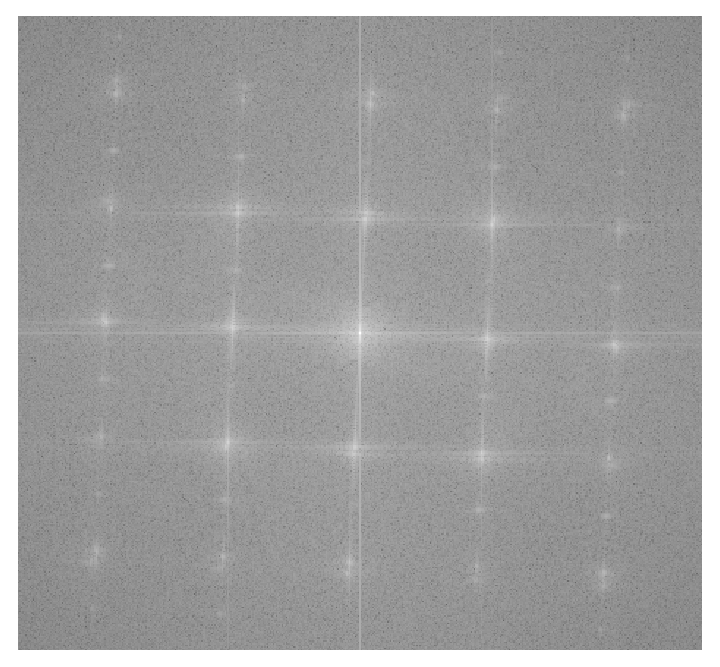

In [212]:
#plot image and power spectrum.

img_plot = s_crop.plot(axes_off = True, colorbar = False, title = '')
gpa_tool_plot = s_crop.create_gpa_tool()
gpa_tool_plot.set_fft()
# and plot
gpa_tool_plot.plot_power_spectrum(axes_off = True, colorbar = False, title = '')